In [91]:
import sqlite3
import unicodecsv
import pandas as pd
import numpy as np
import datetime


In [2]:
%load_ext sql
%sql sqlite:///2016_bustimes.db

/opt/conda/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


u'Connected: None@2016_bustimes.db'

In [3]:
#connects overall database
conn = sqlite3.connect('2016_bustimes.db')
cur = conn.cursor()

In [122]:
q111_bus_schedule = pd.read_csv('q111_bus.csv')
q111_bus_schedule.columns = ["148 Av/F Lewis Blvd", "G Brewer Blvd/Farmers Blvd", "G Brewer Blvd/Linden Blvd", "G Brewer Blvd/Archer Av", "Hillside Av/Parsons Blvd"]
q111_bus_schedule
#csv file contained a table of these values where the times were converted from 12:00 to 24:00 format and '-' were changed to NONE

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd
0,1:35,1:45,1:54,2:00,2:06
1,2:35,2:46,2:55,3:01,3:07
2,3:35,3:46,3:55,4:01,4:07
3,4:35,4:47,4:59,5:06,5:12
4,NONE,5:02,5:16,5:23,5:29
5,5:05,5:18,5:30,5:38,5:44
6,NONE,5:25,5:39,5:47,5:53
7,NONE,5:32,5:46,5:54,6:00
8,NONE,5:38,5:52,6:00,6:07
9,5:31,5:45,5:57,6:05,6:12


In [123]:
q111_bus_schedule["Hillside Av/Parsons Blvd"] = pd.to_datetime(q111_bus_schedule["Hillside Av/Parsons Blvd"]).apply(lambda x: x.strftime(r'%H:%M'))

#"Hillside Av/Parsons Blvd" represents the time of arrival at the last stop in the route, 
#these were changed to date time objects with format %H:%M


In [124]:
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd
0,1:35,1:45,1:54,2:00,02:06
1,2:35,2:46,2:55,3:01,03:07
2,3:35,3:46,3:55,4:01,04:07
3,4:35,4:47,4:59,5:06,05:12
4,NONE,5:02,5:16,5:23,05:29
5,5:05,5:18,5:30,5:38,05:44
6,NONE,5:25,5:39,5:47,05:53
7,NONE,5:32,5:46,5:54,06:00
8,NONE,5:38,5:52,6:00,06:07
9,5:31,5:45,5:57,6:05,06:12


In [125]:
q111_bus_schedule["148 Av/F Lewis Blvd"] = q111_bus_schedule["148 Av/F Lewis Blvd"].replace('NONE', np.nan)
#"148 Av/F Lewis Blvd" represents the first stop, 
#or the departure time. the NONE cells in this column were converted to NaN cells

In [118]:
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd
0,1:35,1:45,1:54,2:00,02:06
1,2:35,2:46,2:55,3:01,03:07
2,3:35,3:46,3:55,4:01,04:07
3,4:35,4:47,4:59,5:06,05:12
4,NaN,5:02,5:16,5:23,05:29
5,5:05,5:18,5:30,5:38,05:44
6,NaN,5:25,5:39,5:47,05:53
7,NaN,5:32,5:46,5:54,06:00
8,NaN,5:38,5:52,6:00,06:07
9,5:31,5:45,5:57,6:05,06:12


In [136]:
q111_bus_schedule["148 Av/F Lewis Blvd"] = pd.to_datetime(q111_bus_schedule["148 Av/F Lewis Blvd"])
#"148 Av/F Lewis Blvd" converted to date time objects

In [142]:
q111_bus_schedule["148 Av/F Lewis Blvd"] = q111_bus_schedule["148 Av/F Lewis Blvd"].map(lambda x: x.strftime('%H:%M') if pd.notnull(x) else '')
#the date time objects were changed of format

In [144]:
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd
0,01:35,1:45,1:54,2:00,02:06
1,02:35,2:46,2:55,3:01,03:07
2,03:35,3:46,3:55,4:01,04:07
3,04:35,4:47,4:59,5:06,05:12
4,,5:02,5:16,5:23,05:29
5,05:05,5:18,5:30,5:38,05:44
6,,5:25,5:39,5:47,05:53
7,,5:32,5:46,5:54,06:00
8,,5:38,5:52,6:00,06:07
9,05:31,5:45,5:57,6:05,06:12


In [154]:
q111_bus_schedule["G Brewer Blvd/Farmers Blvd"] = pd.to_datetime(q111_bus_schedule["G Brewer Blvd/Farmers Blvd"])
q111_bus_schedule["G Brewer Blvd/Linden Blvd"] = pd.to_datetime(q111_bus_schedule["G Brewer Blvd/Linden Blvd"])
q111_bus_schedule["G Brewer Blvd/Archer Av"] = pd.to_datetime(q111_bus_schedule["G Brewer Blvd/Archer Av"])
q111_bus_schedule["148 Av/F Lewis Blvd"] = pd.to_datetime(q111_bus_schedule["148 Av/F Lewis Blvd"])
q111_bus_schedule["Hillside Av/Parsons Blvd"] = pd.to_datetime(q111_bus_schedule["Hillside Av/Parsons Blvd"])

In [155]:
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd
0,2017-10-11 01:35:00,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 02:06:00
1,2017-10-11 02:35:00,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 03:07:00
2,2017-10-11 03:35:00,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 04:07:00
3,2017-10-11 04:35:00,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 05:12:00
4,NaT,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,2017-10-11 05:29:00
5,2017-10-11 05:05:00,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:44:00
6,NaT,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,2017-10-11 05:53:00
7,NaT,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,2017-10-11 06:00:00
8,NaT,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,2017-10-11 06:07:00
9,2017-10-11 05:31:00,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 06:12:00


In [156]:
q111_bus_schedule['Total Trip Time'] = q111_bus_schedule["Hillside Av/Parsons Blvd"] - q111_bus_schedule["148 Av/F Lewis Blvd"]

In [168]:
q111_bus_schedule["Total Trip Time"] = pd.to_datetime(q111_bus_schedule["Total Trip Time"]).map(lambda x: x.strftime('%M') if pd.notnull(x) else '')

ValueError: Given date string not likely a datetime.

In [170]:
q111_bus_schedule["Total Trip Time (minutes)"] = q111_bus_schedule["Total Trip Time"]

In [171]:
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd,Total Trip Time,Total Trip Time (minutes)
0,2017-10-11 01:35:00,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 02:06:00,31,31
1,2017-10-11 02:35:00,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 03:07:00,32,32
2,2017-10-11 03:35:00,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 04:07:00,32,32
3,2017-10-11 04:35:00,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 05:12:00,37,37
4,NaT,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,2017-10-11 05:29:00,,
5,2017-10-11 05:05:00,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:44:00,39,39
6,NaT,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,2017-10-11 05:53:00,,
7,NaT,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,2017-10-11 06:00:00,,
8,NaT,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,2017-10-11 06:07:00,,
9,2017-10-11 05:31:00,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 06:12:00,41,41


In [172]:
del q111_bus_schedule["Total Trip Time"]
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd,Total Trip Time (minutes)
0,2017-10-11 01:35:00,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 02:06:00,31
1,2017-10-11 02:35:00,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 03:07:00,32
2,2017-10-11 03:35:00,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 04:07:00,32
3,2017-10-11 04:35:00,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 05:12:00,37
4,NaT,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,2017-10-11 05:29:00,
5,2017-10-11 05:05:00,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:44:00,39
6,NaT,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,2017-10-11 05:53:00,
7,NaT,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,2017-10-11 06:00:00,
8,NaT,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,2017-10-11 06:07:00,
9,2017-10-11 05:31:00,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 06:12:00,41


In [174]:
q111_bus_schedule["G Brewer Blvd/Farmers Blvd, B"] = pd.to_datetime(q111_bus_schedule["G Brewer Blvd/Farmers Blvd"])
q111_bus_schedule["G Brewer Blvd/Linden Blvd, C"] = pd.to_datetime(q111_bus_schedule["G Brewer Blvd/Linden Blvd"])
q111_bus_schedule["G Brewer Blvd/Archer Av, D"] = pd.to_datetime(q111_bus_schedule["G Brewer Blvd/Archer Av"])
q111_bus_schedule["148 Av/F Lewis Blvd, A"] = pd.to_datetime(q111_bus_schedule["148 Av/F Lewis Blvd"])
q111_bus_schedule["Hillside Av/Parsons Blvd, E"] = pd.to_datetime(q111_bus_schedule["Hillside Av/Parsons Blvd"])

In [175]:
q111_bus_schedule

,148 Av/F Lewis Blvd,G Brewer Blvd/Farmers Blvd,G Brewer Blvd/Linden Blvd,G Brewer Blvd/Archer Av,Hillside Av/Parsons Blvd,Total Trip Time (minutes),"G Brewer Blvd/Farmers Blvd, B","G Brewer Blvd/Linden Blvd, C","G Brewer Blvd/Archer Av, D","148 Av/F Lewis Blvd, A","Hillside Av/Parsons Blvd, E"
0,2017-10-11 01:35:00,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 02:06:00,31,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 01:35:00,2017-10-11 02:06:00
1,2017-10-11 02:35:00,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 03:07:00,32,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 02:35:00,2017-10-11 03:07:00
2,2017-10-11 03:35:00,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 04:07:00,32,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 03:35:00,2017-10-11 04:07:00
3,2017-10-11 04:35:00,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 05:12:00,37,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 04:35:00,2017-10-11 05:12:00
4,NaT,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,2017-10-11 05:29:00,,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,NaT,2017-10-11 05:29:00
5,2017-10-11 05:05:00,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:44:00,39,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:05:00,2017-10-11 05:44:00
6,NaT,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,2017-10-11 05:53:00,,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,NaT,2017-10-11 05:53:00
7,NaT,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,2017-10-11 06:00:00,,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,NaT,2017-10-11 06:00:00
8,NaT,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,2017-10-11 06:07:00,,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,NaT,2017-10-11 06:07:00
9,2017-10-11 05:31:00,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 06:12:00,41,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 05:31:00,2017-10-11 06:12:00


In [176]:
del q111_bus_schedule["148 Av/F Lewis Blvd"]
del q111_bus_schedule["G Brewer Blvd/Farmers Blvd"]
del q111_bus_schedule["G Brewer Blvd/Linden Blvd"]
del q111_bus_schedule["G Brewer Blvd/Archer Av"]
del q111_bus_schedule["Hillside Av/Parsons Blvd"]

In [177]:
q111_bus_schedule

,Total Trip Time (minutes),"G Brewer Blvd/Farmers Blvd, B","G Brewer Blvd/Linden Blvd, C","G Brewer Blvd/Archer Av, D","148 Av/F Lewis Blvd, A","Hillside Av/Parsons Blvd, E"
0,31,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 01:35:00,2017-10-11 02:06:00
1,32,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 02:35:00,2017-10-11 03:07:00
2,32,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 03:35:00,2017-10-11 04:07:00
3,37,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 04:35:00,2017-10-11 05:12:00
4,,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,NaT,2017-10-11 05:29:00
5,39,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:05:00,2017-10-11 05:44:00
6,,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,NaT,2017-10-11 05:53:00
7,,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,NaT,2017-10-11 06:00:00
8,,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,NaT,2017-10-11 06:07:00
9,41,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 05:31:00,2017-10-11 06:12:00


In [180]:
q111_bus_schedule['Trip Segment Time (A-B)'] = q111_bus_schedule["G Brewer Blvd/Farmers Blvd, B"] - q111_bus_schedule["148 Av/F Lewis Blvd, A"]
q111_bus_schedule['Trip Segment Time (B-C)'] = q111_bus_schedule["G Brewer Blvd/Linden Blvd, C"] - q111_bus_schedule["G Brewer Blvd/Farmers Blvd, B"]
q111_bus_schedule['Trip Segment Time (C-D)'] = q111_bus_schedule["G Brewer Blvd/Archer Av, D"] - q111_bus_schedule["G Brewer Blvd/Linden Blvd, C"]
q111_bus_schedule['Trip Segment Time (D-E)'] = q111_bus_schedule["Hillside Av/Parsons Blvd, E"] - q111_bus_schedule["G Brewer Blvd/Archer Av, D"]


In [181]:
q111_bus_schedule

,Total Trip Time (minutes),"G Brewer Blvd/Farmers Blvd, B","G Brewer Blvd/Linden Blvd, C","G Brewer Blvd/Archer Av, D","148 Av/F Lewis Blvd, A","Hillside Av/Parsons Blvd, E",Trip Segment Time (A-B),Trip Segment Time (B-C),Trip Segment Time (C-D),Trip Segment Time (D-E)
0,31,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 01:35:00,2017-10-11 02:06:00,00:10:00,00:09:00,00:06:00,00:06:00
1,32,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 02:35:00,2017-10-11 03:07:00,00:11:00,00:09:00,00:06:00,00:06:00
2,32,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 03:35:00,2017-10-11 04:07:00,00:11:00,00:09:00,00:06:00,00:06:00
3,37,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 04:35:00,2017-10-11 05:12:00,00:12:00,00:12:00,00:07:00,00:06:00
4,,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,NaT,2017-10-11 05:29:00,NaT,00:14:00,00:07:00,00:06:00
5,39,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:05:00,2017-10-11 05:44:00,00:13:00,00:12:00,00:08:00,00:06:00
6,,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,NaT,2017-10-11 05:53:00,NaT,00:14:00,00:08:00,00:06:00
7,,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,NaT,2017-10-11 06:00:00,NaT,00:14:00,00:08:00,00:06:00
8,,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,NaT,2017-10-11 06:07:00,NaT,00:14:00,00:08:00,00:07:00
9,41,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 05:31:00,2017-10-11 06:12:00,00:14:00,00:12:00,00:08:00,00:07:00


In [182]:
q111_bus_schedule["Trip Segment Time (A-B)"] = pd.to_datetime(q111_bus_schedule["Trip Segment Time (A-B)"]).map(lambda x: x.strftime('%M') if pd.notnull(x) else '')
q111_bus_schedule["Trip Segment Time (B-C)"] = pd.to_datetime(q111_bus_schedule["Trip Segment Time (B-C)"]).map(lambda x: x.strftime('%M') if pd.notnull(x) else '')
q111_bus_schedule["Trip Segment Time (C-D)"] = pd.to_datetime(q111_bus_schedule["Trip Segment Time (C-D)"]).map(lambda x: x.strftime('%M') if pd.notnull(x) else '')
q111_bus_schedule["Trip Segment Time (D-E)"] = pd.to_datetime(q111_bus_schedule["Trip Segment Time (D-E)"]).map(lambda x: x.strftime('%M') if pd.notnull(x) else '')


In [183]:
q111_bus_schedule

,Total Trip Time (minutes),"G Brewer Blvd/Farmers Blvd, B","G Brewer Blvd/Linden Blvd, C","G Brewer Blvd/Archer Av, D","148 Av/F Lewis Blvd, A","Hillside Av/Parsons Blvd, E",Trip Segment Time (A-B),Trip Segment Time (B-C),Trip Segment Time (C-D),Trip Segment Time (D-E)
0,31,2017-10-11 01:45:00,2017-10-11 01:54:00,2017-10-11 02:00:00,2017-10-11 01:35:00,2017-10-11 02:06:00,10,09,06,06
1,32,2017-10-11 02:46:00,2017-10-11 02:55:00,2017-10-11 03:01:00,2017-10-11 02:35:00,2017-10-11 03:07:00,11,09,06,06
2,32,2017-10-11 03:46:00,2017-10-11 03:55:00,2017-10-11 04:01:00,2017-10-11 03:35:00,2017-10-11 04:07:00,11,09,06,06
3,37,2017-10-11 04:47:00,2017-10-11 04:59:00,2017-10-11 05:06:00,2017-10-11 04:35:00,2017-10-11 05:12:00,12,12,07,06
4,,2017-10-11 05:02:00,2017-10-11 05:16:00,2017-10-11 05:23:00,NaT,2017-10-11 05:29:00,,14,07,06
5,39,2017-10-11 05:18:00,2017-10-11 05:30:00,2017-10-11 05:38:00,2017-10-11 05:05:00,2017-10-11 05:44:00,13,12,08,06
6,,2017-10-11 05:25:00,2017-10-11 05:39:00,2017-10-11 05:47:00,NaT,2017-10-11 05:53:00,,14,08,06
7,,2017-10-11 05:32:00,2017-10-11 05:46:00,2017-10-11 05:54:00,NaT,2017-10-11 06:00:00,,14,08,06
8,,2017-10-11 05:38:00,2017-10-11 05:52:00,2017-10-11 06:00:00,NaT,2017-10-11 06:07:00,,14,08,07
9,41,2017-10-11 05:45:00,2017-10-11 05:57:00,2017-10-11 06:05:00,2017-10-11 05:31:00,2017-10-11 06:12:00,14,12,08,07


In [184]:
q111_bus_schedule["G Brewer Blvd/Farmers Blvd, B"] = q111_bus_schedule["G Brewer Blvd/Farmers Blvd, B"].map(lambda x: x.strftime('%H:%M') if pd.notnull(x) else '')
q111_bus_schedule["G Brewer Blvd/Linden Blvd, C"] = q111_bus_schedule["G Brewer Blvd/Linden Blvd, C"].map(lambda x: x.strftime('%H:%M') if pd.notnull(x) else '')
q111_bus_schedule["G Brewer Blvd/Archer Av, D"] = q111_bus_schedule["G Brewer Blvd/Archer Av, D"].map(lambda x: x.strftime('%H:%M') if pd.notnull(x) else '')
q111_bus_schedule["Hillside Av/Parsons Blvd, E"] = q111_bus_schedule["Hillside Av/Parsons Blvd, E"].map(lambda x: x.strftime('%H:%M') if pd.notnull(x) else '')
q111_bus_schedule["148 Av/F Lewis Blvd, A"] = q111_bus_schedule["148 Av/F Lewis Blvd, A"].map(lambda x: x.strftime('%H:%M') if pd.notnull(x) else '')
#converts the date time object into a '%H:%M' format

In [185]:
q111_bus_schedule

,Total Trip Time (minutes),"G Brewer Blvd/Farmers Blvd, B","G Brewer Blvd/Linden Blvd, C","G Brewer Blvd/Archer Av, D","148 Av/F Lewis Blvd, A","Hillside Av/Parsons Blvd, E",Trip Segment Time (A-B),Trip Segment Time (B-C),Trip Segment Time (C-D),Trip Segment Time (D-E)
0,31,01:45,01:54,02:00,01:35,02:06,10,09,06,06
1,32,02:46,02:55,03:01,02:35,03:07,11,09,06,06
2,32,03:46,03:55,04:01,03:35,04:07,11,09,06,06
3,37,04:47,04:59,05:06,04:35,05:12,12,12,07,06
4,,05:02,05:16,05:23,,05:29,,14,07,06
5,39,05:18,05:30,05:38,05:05,05:44,13,12,08,06
6,,05:25,05:39,05:47,,05:53,,14,08,06
7,,05:32,05:46,05:54,,06:00,,14,08,06
8,,05:38,05:52,06:00,,06:07,,14,08,07
9,41,05:45,05:57,06:05,05:31,06:12,14,12,08,07


In [187]:
cols = q111_bus_schedule.columns.tolist()
cols

['Total Trip Time (minutes)',
 'G Brewer Blvd/Farmers Blvd, B',
 'G Brewer Blvd/Linden Blvd, C',
 'G Brewer Blvd/Archer Av, D',
 '148 Av/F Lewis Blvd, A',
 'Hillside Av/Parsons Blvd, E',
 'Trip Segment Time (A-B)',
 'Trip Segment Time (B-C)',
 'Trip Segment Time (C-D)',
 'Trip Segment Time (D-E)']

In [191]:
cols = ['148 Av/F Lewis Blvd, A', 'Trip Segment Time (A-B)', 
 'G Brewer Blvd/Farmers Blvd, B', 'Trip Segment Time (B-C)', 
 'G Brewer Blvd/Linden Blvd, C', 'Trip Segment Time (C-D)', 
 'G Brewer Blvd/Archer Av, D', 'Trip Segment Time (D-E)',
 'Hillside Av/Parsons Blvd, E', 'Total Trip Time (minutes)']
q111_bus_schedule = q111_bus_schedule[cols]
q111_bus_schedule
#rearranges the dataframe

,"148 Av/F Lewis Blvd, A",Trip Segment Time (A-B),"G Brewer Blvd/Farmers Blvd, B",Trip Segment Time (B-C),"G Brewer Blvd/Linden Blvd, C",Trip Segment Time (C-D),"G Brewer Blvd/Archer Av, D",Trip Segment Time (D-E),"Hillside Av/Parsons Blvd, E",Total Trip Time (minutes)
0,01:35,10,01:45,09,01:54,06,02:00,06,02:06,31
1,02:35,11,02:46,09,02:55,06,03:01,06,03:07,32
2,03:35,11,03:46,09,03:55,06,04:01,06,04:07,32
3,04:35,12,04:47,12,04:59,07,05:06,06,05:12,37
4,,,05:02,14,05:16,07,05:23,06,05:29,
5,05:05,13,05:18,12,05:30,08,05:38,06,05:44,39
6,,,05:25,14,05:39,08,05:47,06,05:53,
7,,,05:32,14,05:46,08,05:54,06,06:00,
8,,,05:38,14,05:52,08,06:00,07,06:07,
9,05:31,14,05:45,12,05:57,08,06:05,07,06:12,41


In [241]:
total_trip_times = q111_bus_schedule['Total Trip Time (minutes)'].tolist()

In [242]:
total_trip_times = [item for item in total_trip_times if item != '']

In [244]:

y = []
for i in total_trip_times:
    y.append(int(i))


In [228]:
departure_times = q111_bus_schedule['148 Av/F Lewis Blvd, A'].tolist()
departure_times = [item for item in departure_times if item != '']

In [218]:
sum(x)/len(x)

40

In [248]:
import numpy as np

In [310]:
print(len(departure_times))
print(len(y))
x = range(104)
ticks = []
for i in range(21):
    ticks.append(departure_times[i*5])
ticks

104
104


['01:35',
 '05:31',
 '06:10',
 '06:44',
 '07:09',
 '07:21',
 '07:53',
 '08:40',
 '09:26',
 '10:27',
 '11:12',
 '12:13',
 '12:52',
 '13:38',
 '14:27',
 '15:17',
 '16:39',
 '18:20',
 '19:40',
 '21:20',
 '23:10']

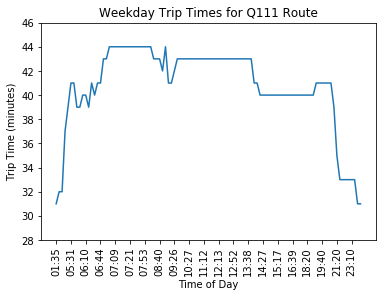

In [314]:
import matplotlib.pyplot as plt

#plt.xticks(np.arange(min(x), max(x)+1, 5), rotation ='vertical')
plt.xticks(np.arange(min(x), max(x)+1, 5), ticks, rotation ='vertical')

plt.ylim(28, 46)
plt.title('Weekday Trip Times for Q111 Route')
plt.xlabel('Time of Day')
plt.ylabel('Trip Time (minutes)')

plt.plot(x, y)
plt.show()


In [315]:
q111 = pd.read_csv('q111_weekday_final.csv')
#q111_bus_schedule.columns = ["148 Av/F Lewis Blvd", "G Brewer Blvd/Farmers Blvd", "G Brewer Blvd/Linden Blvd", "G Brewer Blvd/Archer Av", "Hillside Av/Parsons Blvd"]
q111

,trip_id,departure_time,trip_time,score
0,11119418-BPPA6-BP_A6-Weekday-10,15:21:00,40.0,0.0
1,11119483-BPPA6-BP_A6-Weekday-10,23:15:00,31.0,-9.0
2,11119501-BPPA6-BP_A6-Weekday-10,01:35:00,30.0,-10.0
3,11119507-BPPA6-BP_A6-Weekday-10,07:32:00,44.0,4.0
4,11119514-BPPA6-BP_A6-Weekday-10,04:35:00,31.0,-9.0
5,11119516-BPPA6-BP_A6-Weekday-10,05:55:00,38.0,-2.0
6,11119518-BPPA6-BP_A6-Weekday-10,07:14:00,44.0,4.0
7,11119549-BPPA6-BP_A6-Weekday-10,06:40:00,41.0,1.0
8,11119551-BPPA6-BP_A6-Weekday-10,05:45:00,38.0,-2.0
9,11119559-BPPA6-BP_A6-Weekday-10,06:56:00,43.0,3.0


In [336]:
q111['departure_time'] = pd.to_datetime(q111['departure_time'], format= '%H:%M:%S', errors='ignore')

In [339]:
q111 = q111.sort_values(by='departure_time')

In [340]:
q111.dropna()

,trip_id,departure_time,trip_time,score
538,12718742-BPPC6-BP_C6-Weekday-30,01:35:00,30.0,-10.0
2,11119501-BPPA6-BP_A6-Weekday-10,01:35:00,30.0,-10.0
207,11119501-BPPA6-BP_A6-Weekday-10-SDon,01:35:00,30.0,-10.0
198,11132360-BPPA6-BP_H6-Weekday-20,01:35:00,30.0,-10.0
429,11760903-BPPB6-BP_B6-Weekday-10-SDon,01:35:00,30.0,-10.0
318,11760903-BPPB6-BP_B6-Weekday-10,01:35:00,30.0,-10.0
415,11761745-BPPB6-BP_B6-Weekday-10,02:35:00,30.0,-10.0
526,11761745-BPPB6-BP_B6-Weekday-10-SDon,02:35:00,30.0,-10.0
99,11120344-BPPA6-BP_A6-Weekday-10,02:35:00,30.0,-10.0
539,12718743-BPPC6-BP_C6-Weekday-30,02:35:00,30.0,-10.0


In [342]:
departure_times2 = q111['departure_time'].tolist()

In [343]:
departure_times3 = []
for i in departure_times2:
    departure_times3.append(i[:5])

In [350]:
type(departure_times3[0])

str

In [348]:
score = q111['score'].tolist()


In [352]:
q111.to_sql(name='q111_updated', con= conn)

In [353]:
%%sql
SELECT * FROM sqlite_master

Done.


type,name,tbl_name,rootpage,sql
table,Stop_Times_20160103,Stop_Times_20160103,2,"CREATE TABLE ""Stop_Times_20160103""(trip_id TEXT,arrival_time TEXT, departure_time TEXT, stop_id INT, stop_sequence INT, pickup_type INT, drop_off_type INT)"
table,Routes_20160103,Routes_20160103,24035,"CREATE TABLE ""Routes_20160103""(route_id TEXT, agency_id TEXT, route_short_name TEXT, route_long_name TEXT, route_desc TEXT, route_type INT, route_url TEXT, route_color TEXT, route_text_color TEXT)"
table,Stops_20160103,Stops_20160103,24039,"CREATE TABLE ""Stops_20160103""(stop_id INT, stop_name TEXT, stop_desc TEXT, stop_lat INT, stop_lon INT)"
table,Trips_20160103,Trips_20160103,24101,"CREATE TABLE ""Trips_20160103""(route_id TEXT, service_id TEXT, trip_id TEXT, trip_headsign TEXT, direction_id INT, block_id INT, shape_id TEXT)"
table,Stop_Times_20160403,Stop_Times_20160403,25418,"CREATE TABLE Stop_Times_20160403(trip_id TEXT,arrival_time TEXT, departure_time TEXT, stop_id INT, stop_sequence INT, pickup_type INT, drop_off_type INT)"
table,Routes_20160403,Routes_20160403,44064,"CREATE TABLE Routes_20160403(route_id TEXT, agency_id TEXT, route_short_name TEXT, route_long_name TEXT, route_desc TEXT, route_type INT, route_url TEXT, route_color TEXT, route_text_color TEXT)"
table,Stops_20160403,Stops_20160403,44068,"CREATE TABLE Stops_20160403(stop_id INT, stop_name TEXT, stop_desc TEXT, stop_lat INT, stop_lon INT)"
table,Trips_20160403,Trips_20160403,44130,"CREATE TABLE Trips_20160403(route_id TEXT, service_id TEXT, trip_id TEXT, trip_headsign TEXT, direction_id INT, block_id INT, shape_id TEXT)"
table,Stop_Times_20160703,Stop_Times_20160703,45162,"CREATE TABLE Stop_Times_20160703(trip_id TEXT,arrival_time TEXT, departure_time TEXT, stop_id INT, stop_sequence INT, pickup_type INT, drop_off_type INT)"
table,Routes_20160703,Routes_20160703,59647,"CREATE TABLE Routes_20160703(route_id TEXT, agency_id TEXT, route_short_name TEXT, route_long_name TEXT, route_desc TEXT, route_type INT, route_url TEXT, route_color TEXT, route_text_color TEXT)"


In [357]:
%%sql
DROP TABLE IF EXISTS avg_score_q111;
CREATE TABLE IF NOT EXISTS avg_score_q111 AS
    SELECT 
        DISTINCT(departure_time) as departure_time, AVG(score) as average_score
    FROM
        q111_updated
    GROUP BY
        departure_time

Done.
Done.


[]

In [358]:
%%sql
SELECT * FROM avg_score_q111

Done.


departure_time,average_score
01:35:00,-10.0
02:35:00,-10.0
03:35:00,-10.0
04:35:00,-9.0
05:05:00,-2.0
05:20:00,-2.0
05:30:00,-2.0
05:31:00,-2.0
05:44:00,-2.0
05:45:00,-2.0


In [6]:
avg_score_q111 = pd.read_sql_query("select * from avg_score_q111", conn)
avg_score_q111 = avg_score_q111.drop([271])
avg_score_q111['departure_time'][269] = '00:10:00'
avg_score_q111['departure_time'][270] = '00:22:00'
avg_score_q111

/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,departure_time,average_score
0,01:35:00,-10.0
1,02:35:00,-10.0
2,03:35:00,-10.0
3,04:35:00,-9.0
4,05:05:00,-2.0
5,05:20:00,-2.0
6,05:30:00,-2.0
7,05:31:00,-2.0
8,05:44:00,-2.0
9,05:45:00,-2.0


In [7]:
avg_score_q111['departure_time'] = pd.to_datetime(avg_score_q111['departure_time'])

#avg_score_q111['departure_time'] = avg_score_q111['departure_time'].map(lambda x: x.strftime('%H:%M'))

In [8]:
avg_score_q111 = avg_score_q111.sort_values(by='departure_time')
avg_score_q111

,departure_time,average_score
269,2017-11-15 00:10:00,-9.0
270,2017-11-15 00:22:00,-9.0
0,2017-11-15 01:35:00,-10.0
1,2017-11-15 02:35:00,-10.0
2,2017-11-15 03:35:00,-10.0
3,2017-11-15 04:35:00,-9.0
4,2017-11-15 05:05:00,-2.0
5,2017-11-15 05:20:00,-2.0
6,2017-11-15 05:30:00,-2.0
7,2017-11-15 05:31:00,-2.0


In [9]:
avg_score_q111['departure_time'] = avg_score_q111.departure_time.map(lambda x: x.strftime("%H:%M"))

In [10]:
avg_score_q111.index = avg_score_q111['departure_time']
avg_score_q111

,departure_time,average_score
departure_time,,
00:10,00:10,-9.0
00:22,00:22,-9.0
01:35,01:35,-10.0
02:35,02:35,-10.0
03:35,03:35,-10.0
04:35,04:35,-9.0
05:05,05:05,-2.0
05:20,05:20,-2.0
05:30,05:30,-2.0


In [11]:
avg_score_q111.index = pd.to_datetime(avg_score_q111.index.astype(str))

In [410]:
from matplotlib import dates as d
import datetime as dt

In [405]:
fig, ax = plt.subplots(1, figsize=(12,6))
ax.set_title('Q111 bus scores', fontsize=14)
ax.set_ylabel('Score (minute)', fontsize=14, weight='bold')
ax.set_xlabel('Time of Day', fontsize=14)

In [413]:
ax.plot(avg_score_q111.index, avg_score_q111['average_score'])
plt.show()

In [411]:
ticks = ax.get_xticks()
ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 5))
ax.set_xticks(np.linspace(ticks[0], d.date2num(d.num2date(ticks[-1]) + dt.timedelta(hours=3)), 25), minor=True)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%I:%M %p'))

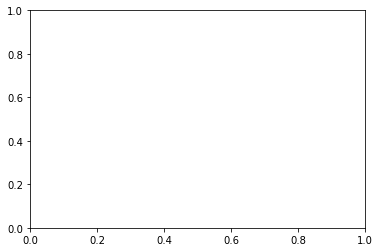

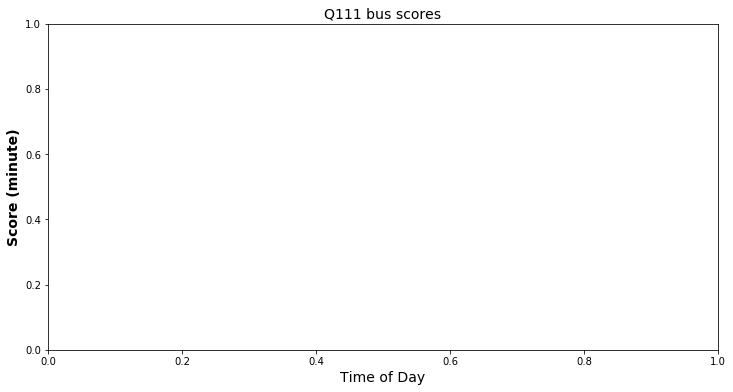

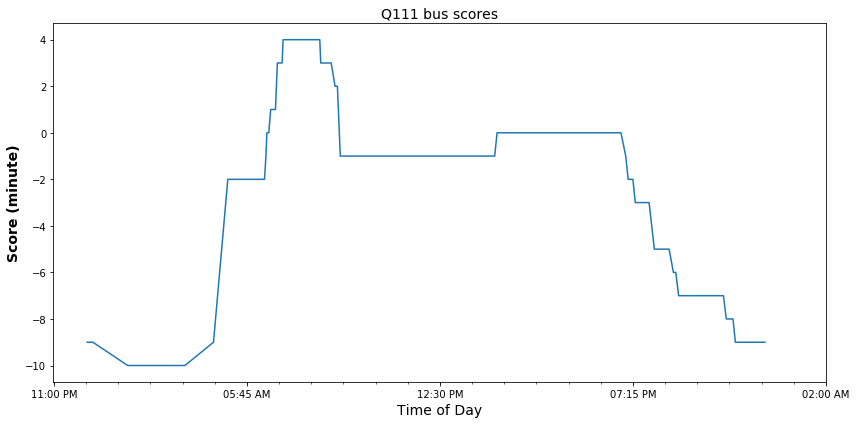

In [412]:
plt.tight_layout()
plt.show()

In [414]:
import bokeh

In [17]:
from bokeh.plotting import figure, output_file, show


In [12]:
avg_score_q111.index

DatetimeIndex(['2017-11-15 00:10:00', '2017-11-15 00:22:00',
               '2017-11-15 01:35:00', '2017-11-15 02:35:00',
               '2017-11-15 03:35:00', '2017-11-15 04:35:00',
               '2017-11-15 05:05:00', '2017-11-15 05:20:00',
               '2017-11-15 05:30:00', '2017-11-15 05:31:00',
               ...
               '2017-11-15 22:25:00', '2017-11-15 22:31:00',
               '2017-11-15 22:45:00', '2017-11-15 22:50:00',
               '2017-11-15 22:52:00', '2017-11-15 23:10:00',
               '2017-11-15 23:15:00', '2017-11-15 23:22:00',
               '2017-11-15 23:40:00', '2017-11-15 23:52:00'],
              dtype='datetime64[ns]', name=u'departure_time', length=271, freq=None)

In [15]:
import sqlite3
import pandas as pd
import datetime
import bokeh

In [4]:
conn = sqlite3.connect('2016_bustimes.db')
cur = conn.cursor()

In [5]:
avg_score_q6 = pd.read_sql_query("select * from avg_score_q6", conn)
avg_score_q6['departure_time'] = pd.to_datetime(avg_score_q6['departure_time'])
avg_score_q6.index = avg_score_q6['departure_time']
avg_score_q6.index = pd.to_datetime(avg_score_q6.index.astype(str))

In [54]:
avg_score_q114 = pd.read_sql_query("select * from avg_score_q114", conn)
avg_score_q114 = avg_score_q114.dropna(subset = ['average_score'])
avg_score_q114 = avg_score_q114.drop(avg_score_q114.index[len(avg_score_q114)-1])
#avg_score_q114
avg_score_q114['departure_time'] = pd.to_datetime(avg_score_q114['departure_time'])
avg_score_q114['departure_time'] = avg_score_q114['departure_time'].map(lambda t: t.replace(year=2017, month=11, day=15))
avg_score_q114.index = avg_score_q114['departure_time']
avg_score_q114.index = pd.to_datetime(avg_score_q114.index.astype(str))

In [55]:
test = avg_score_q114['departure_time'].tolist()
test[0]


Timestamp('2017-11-15 01:30:00')

In [13]:
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.models import DatetimeTickFormatter
from bokeh.models import HoverTool
from math import pi

In [60]:
p = figure(plot_width=700, plot_height=500, x_axis_label='Time of Day', y_axis_label='Score (minutes)')
p.line(avg_score_q111.index, avg_score_q111['average_score'], color="firebrick", alpha=0.6, line_width=4, legend = 'Q111')
p.line(avg_score_q6.index, avg_score_q6['average_score'], color="#2171b5", alpha=0.6, line_width=4, legend = 'Q6')
p.line(avg_score_q114.index, avg_score_q114['average_score'], color="#2ca25f", alpha=0.6, line_width=4, legend = 'Q113/Q114')
p.xaxis.formatter=DatetimeTickFormatter(
            hours=["%H:%m"],
            days=["%H:%m"],
            months=["%H:%m"],
            years=["%H:%m"],
        )
p.xaxis.major_label_orientation = pi/4
p.yaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_style = "bold"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"


p.title.text = "Trip Time Variation Throughout the Day"
p.title.align = "center"
p.title.text_font_size = "25px"
p.title.text_color = "black"

p.legend.location = "top_left"



html = file_html(p, CDN, "my plot")

In [61]:
print html


<!DOCTYPE html>
<html lang="en">
    <head>
        <meta charset="utf-8">
        <title>my plot</title>
        
<link rel="stylesheet" href="https://cdn.pydata.org/bokeh/release/bokeh-0.12.4.min.css" type="text/css" />
        
<script type="text/javascript" src="https://cdn.pydata.org/bokeh/release/bokeh-0.12.4.min.js"></script>
<script type="text/javascript">
    Bokeh.set_log_level("info");
</script>
        <style>
          html {
            width: 100%;
            height: 100%;
          }
          body {
            width: 90%;
            height: 100%;
            margin: auto;
          }
        </style>
    </head>
    <body>
        
        <div class="bk-root">
            <div class="bk-plotdiv" id="95d5d0e3-fa51-41b7-8193-b59fc363a007"></div>
        </div>
        
        <script type="text/javascript">
            (function() {
          var fn = function() {
            Bokeh.safely(function() {
              var docs_json = {"d60b7d15-1dc3-40be-8c3f-fdcc22cf